In [1]:
!pip install matplotlib

In [2]:
%run utilities.ipynb

In [3]:
import matplotlib.pyplot as plt
import polars as pl
from collections import defaultdict

In [9]:
df_polars = pl.read_csv("Polars.csv")
df_pandas_pyarrow = pl.read_csv("Pandas2.0Pyarrow.csv")
df_pandas_numpy = pl.read_csv("Pandas2.0Numpy.csv")

cols = ["Polars", "Pandas2.0Pyarrow", "Pandas2.0Numpy"]

In [12]:
stats = [x for x in df_polars.columns if x not in ["type", "repetitions"]]
type_c = "sum"
dict_stats = defaultdict(list)
for s in stats:
    dict_stats[s].append(df_polars.filter(pl.col("type") == type_c).select(pl.col(s)).item())
    dict_stats[s].append(df_pandas_pyarrow.filter(pl.col("type") == type_c).select(pl.col(s)).item())
    dict_stats[s].append(df_pandas_numpy.filter(pl.col("type") == type_c).select(pl.col(s)).item())

total_list = []

for i in range(len(cols)):
    sum_l = []
    for k in dict_stats.keys():
        if not k.startswith("memory_"):
            sum_l.append(dict_stats[k][i])
    total_list.append(sum(sum_l))

total_list_memory = []

for i in range(len(cols)):
    sum_l = []
    for k in dict_stats.keys():
        if k.startswith("memory_"):
            sum_l.append(dict_stats[k][i])
    total_list_memory.append(sum(sum_l))
    

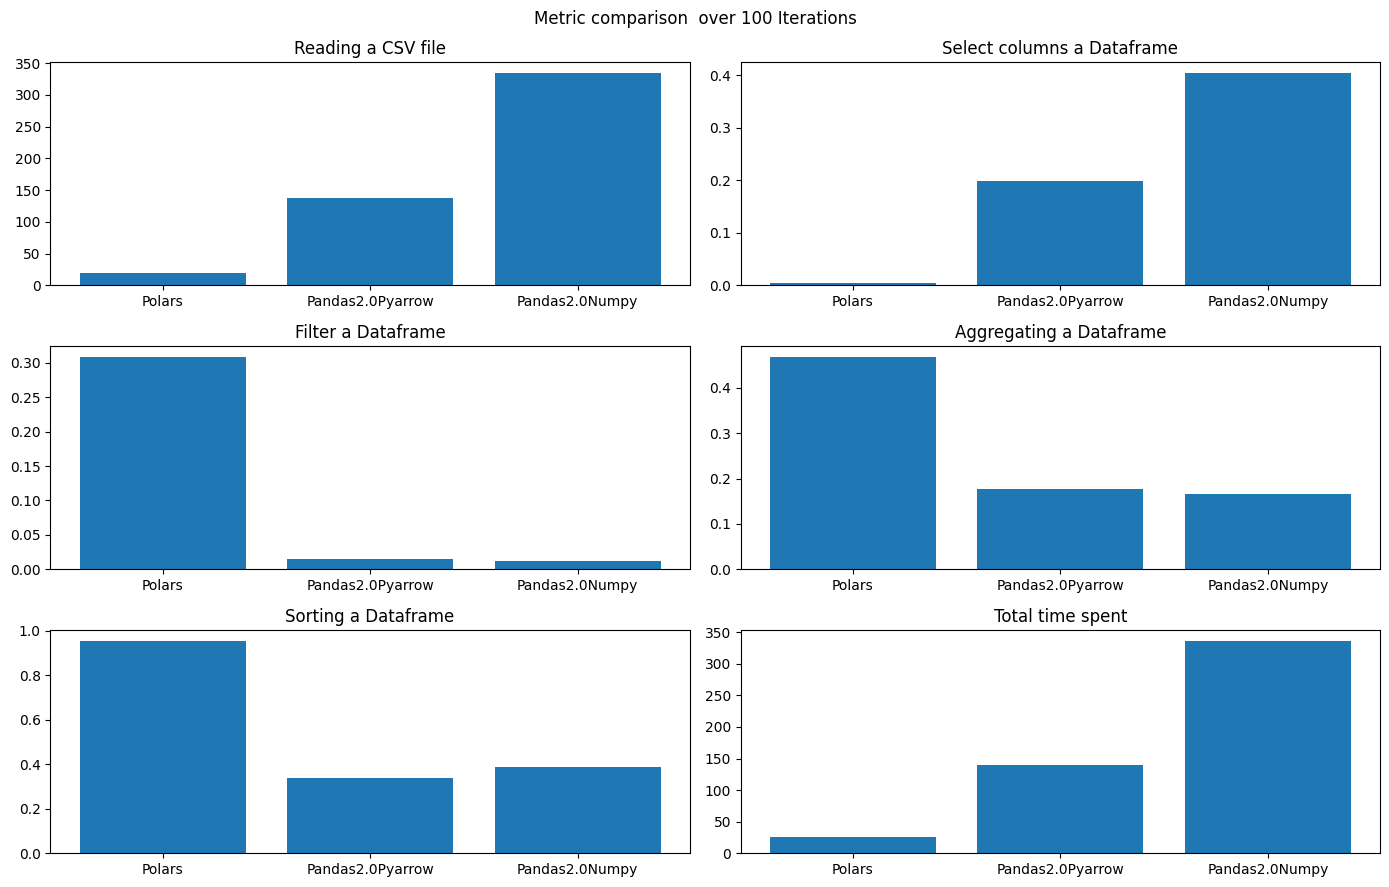

In [13]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2,figsize=(14, 9))
fig.suptitle(f'Metric comparison  over {REPETITIONS} Iterations')

ax1.bar(cols, dict_stats["read_file"])
ax1.title.set_text('Reading a CSV file')

ax2.bar(cols, dict_stats["select"])
ax2.title.set_text('Select columns a Dataframe')

ax3.bar(cols, dict_stats["filter"])
ax3.title.set_text('Filter a Dataframe')

ax4.bar(cols, dict_stats["agg"])
ax4.title.set_text('Aggregating a Dataframe')

ax5.bar(cols, dict_stats["sort"])
ax5.title.set_text('Sorting a Dataframe')

ax6.bar(cols, total_list)
ax6.title.set_text('Total time spent')

plt.tight_layout()
plt.show()

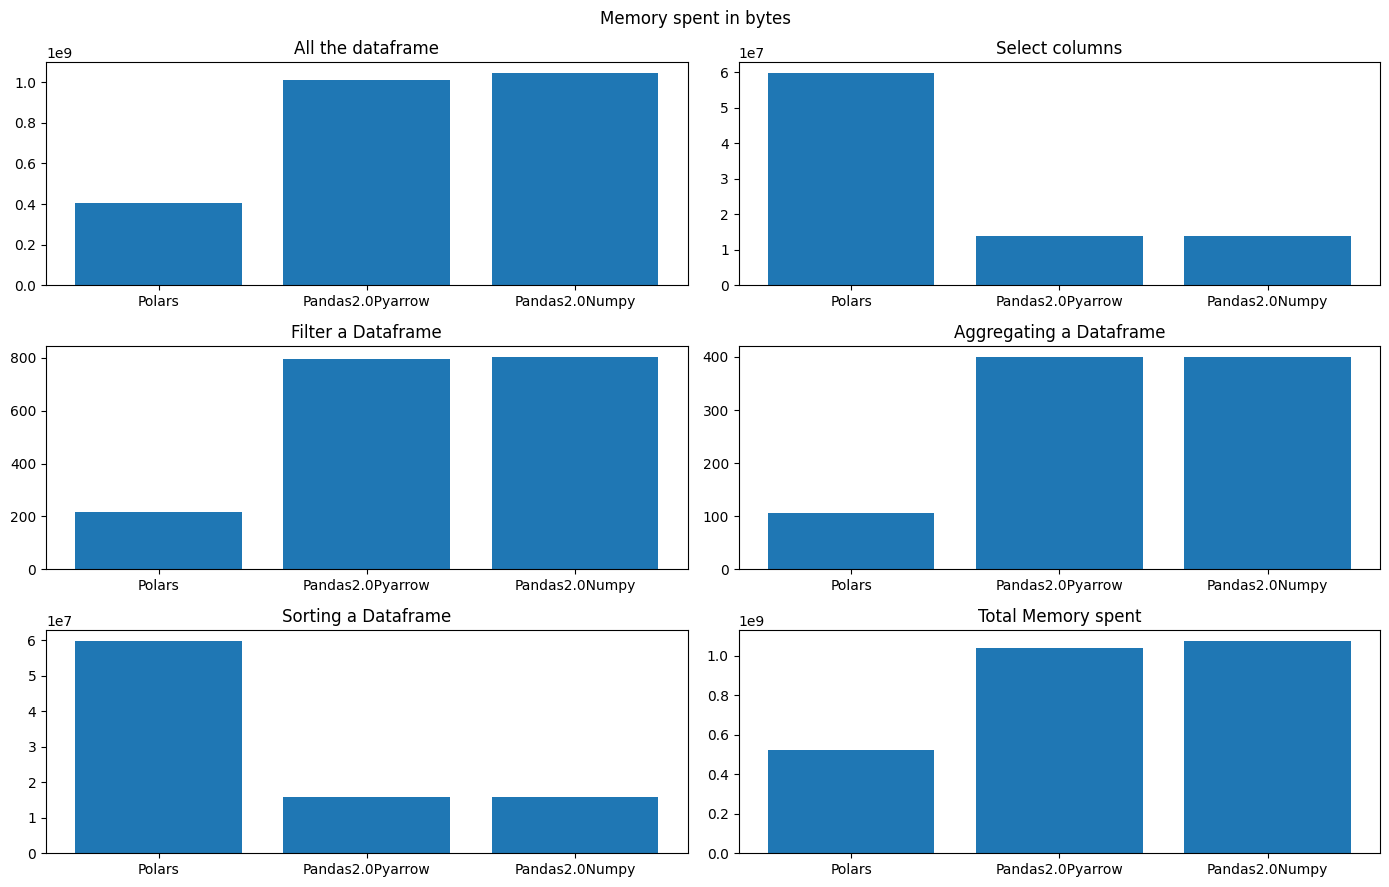

In [14]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2,figsize=(14, 9))
fig.suptitle(f'Memory spent in bytes')

ax1.bar(cols, dict_stats["memory_size_read"])
ax1.title.set_text('All the dataframe')

ax2.bar(cols, dict_stats["memory_size_select"])
ax2.title.set_text('Select columns')

ax3.bar(cols, dict_stats["memory_size_filter"])
ax3.title.set_text('Filter a Dataframe')

ax4.bar(cols, dict_stats["memory_size_agg"])
ax4.title.set_text('Aggregating a Dataframe')

ax5.bar(cols, dict_stats["memory_size_sort"])
ax5.title.set_text('Sorting a Dataframe')

ax6.bar(cols, total_list_memory)
ax6.title.set_text('Total Memory spent')

plt.tight_layout()
plt.show()